# 10. Baselines

   Implement four baselines for the task in **TODO_baselines.py**. </br>
   `Majority baseline:` always assigns the majority class</br>
   `Random baseline:` randomly assigns one of the classes</br>
   `Length baseline:` determines the class based on a length threshold </br>
   `Frequency baseline:` determines the class based on a frequency threshold

In [1]:
import pandas as pd
import spacy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordfreq import zipf_frequency, word_frequency

In [2]:
df_sent = open("../datas/sentences.txt",encoding="utf-8")
data_sentences = df_sent.read().split('\n')
data_sentences[:10]

['children are thought to be aged three , eight , and ten years , alongside an eighteen-month-old baby .',
 'We mixed different concentrations of ROS with the spores , plated them out on petridishes with an agar-solution where fungus can grow on .',
 'They feel they are under-represented in higher education and are suffering in a regional economic downturn .',
 'Especially as it concerns a third party building up its military presence near our borders .',
 'Police said three children were hospitalised for \\" severe dehydration \\" .',
 'Virginia Álvarez , who wrote the report , noted , \\" instead of listening to their demands , instead of starting a dialogue , authorities are doing everything they can to impede people from protesting \\" .',
 'US troops and tanks in Poland in 2015 , as part of an earlier deployment under Operation Atlantic Resolve .',
 'Furthermore , Everson argues the Fox News criteria are not \\" objective , \\" as Title 11 requires , because they fail to define th

In [3]:
df_lab = open("../datas/labels.txt",encoding="utf-8")
data_labels = df_lab.read().split('\n')
data_labels[:10]

['N N N N N N N N N N N N N N C N C N N',
 'N N N C N N N N C N C N N N C N N C N C N N N N',
 'N N N N C N N C N N C N N C C C N',
 'C N N C N N N N N N C C N N C N',
 'N N N N N C N N C C N N',
 'N N N N N N N N N N N N N N N N N N N N N N C N C N N N N N N C N N C N N',
 'N N N N N N N N N N N N N N C N C N C N',
 'C N N C N N N C N N N C N N N N N N N N N N N C N N N C N N N C N N C N N N',
 'N C N N N C C N N N N N',
 'N C N N N N N N C N N N N N N N C N N N N N N N C N N N N C C N N N N']

In [4]:
labels_list = []

for labels in data_labels:
    for label in labels.split(' '):
        labels_list.append(label)

print(labels_list[:20])

['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'C', 'N', 'C', 'N', 'N', 'N']


In [5]:
sentence_list = []

for sentences in data_sentences:
    for word in sentences.split(' '):
        sentence_list.append(word)

print(sentence_list[:20])

['children', 'are', 'thought', 'to', 'be', 'aged', 'three', ',', 'eight', ',', 'and', 'ten', 'years', ',', 'alongside', 'an', 'eighteen-month-old', 'baby', '.', 'We']


In [6]:
print(len(data_sentences))
print(len(data_labels))
print(len(labels_list))
print(len(sentence_list))

654
654
14940
14940


In [7]:
train_data = pd.DataFrame()
train_data['sentences'] = sentence_list
train_data['labels'] = labels_list
train_data.drop(train_data.tail(1).index,inplace=True)
train_data

,sentences,labels
0,children,N
1,are,N
2,thought,N
3,to,N
4,be,N
...,...,...
14934,they,N
14935,in,N
14936,the,N
14937,wild,N


In [8]:
nlp = spacy.load("en_core_web_sm")

## Frequency of the tokens

In [9]:
frequency_of_tokens = {}
freq_list = []

for row in range(len(train_data)):
    doc = nlp(train_data.loc[row, "sentences"])
    for token in doc.sents:
        frequency = zipf_frequency(token.text, 'en', wordlist='small')
        frequency_of_tokens.update({token.text: frequency})
        freq_list.append(frequency)

        
print(list(frequency_of_tokens.items())[:10])
print(freq_list[:10])

[('children', 5.47), ('are', 6.74), ('thought', 5.59), ('to', 7.43), ('be', 6.79), ('aged', 4.5), ('three', 5.78), (',', 0.0), ('eight', 5.02), ('and', 7.41)]
[5.47, 6.74, 5.59, 7.43, 6.79, 4.5, 5.78, 0.0, 5.02, 0.0]


## Length of each tokens in a sentence

In [10]:
token_length_each = []
tokens_each = []

for row in range(len(train_data)):
    doc = nlp(train_data.loc[row, "sentences"])
    for token in doc.sents:
        tokens_each.append(token.text)
        token_length_each.append(len(token.text))
        
print(token_length_each[:10])

[8, 3, 7, 2, 2, 4, 5, 1, 5, 1]


In [11]:
print(len(token_length_each))
print(len(freq_list))

14939
14939


In [12]:
train_data['length'] = token_length_each
train_data['frequency'] = freq_list
train_data

,sentences,labels,length,frequency
0,children,N,8,5.47
1,are,N,3,6.74
2,thought,N,7,5.59
3,to,N,2,7.43
4,be,N,2,6.79
...,...,...,...,...
14934,they,N,4,6.50
14935,in,N,2,7.27
14936,the,N,3,7.73
14937,wild,N,4,4.80


`Majority baseline:` always assigns the majority class.

In [13]:
n_label =train_data["labels"][train_data["labels"] == "N"]
c_label =train_data["labels"][train_data["labels"] == "C"]

print(len(n_label)) # majority class is N
print(len(c_label))
majority_class = 'N'

12449
2490


`Random baseline:` randomly assigns one of the classes.

In [14]:
random_class = np.random.choice(['N' , 'C'])
print(random_class)

C


In [15]:
print(max(train_data["frequency"]))
print(min(train_data["frequency"]))

7.73
0.0


`Frequency baseline:` determines the class based on a frequency threshold

In [16]:
print(len(train_data["labels"][train_data["labels"] == 'N'][train_data["frequency"] == 7.73])) # N is high with  most freq
print(len(train_data["labels"][train_data["labels"] == 'C'][train_data["frequency"] == 7.73]))

847
0


In [17]:
train_data["labels"] = train_data["labels"].astype('category') # converting type to category
train_data.dtypes

train_data["numerical_labels"] = train_data["labels"].cat.codes # converting it to numerical
train_data.head()
# N : 1
# C : 0

,sentences,labels,length,frequency,numerical_labels
0,children,N,8,5.47,1
1,are,N,3,6.74,1
2,thought,N,7,5.59,1
3,to,N,2,7.43,1
4,be,N,2,6.79,1


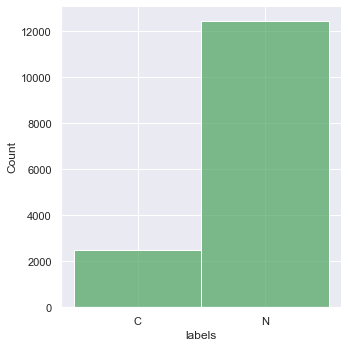

In [18]:
sns.set(color_codes=True)
sns.displot(train_data, x="labels", color="g");

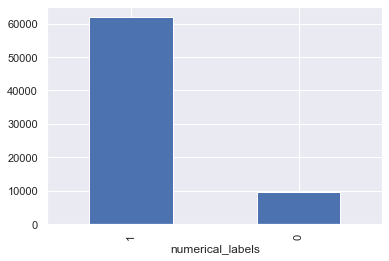

In [20]:
train_data.groupby('numerical_labels')['frequency'].sum().sort_values(ascending=False).plot(kind='bar');

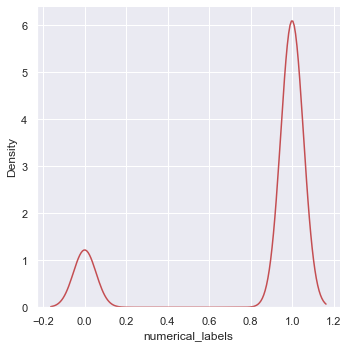

In [33]:
sns.displot(train_data, x="numerical_labels", kind="kde", color="r");

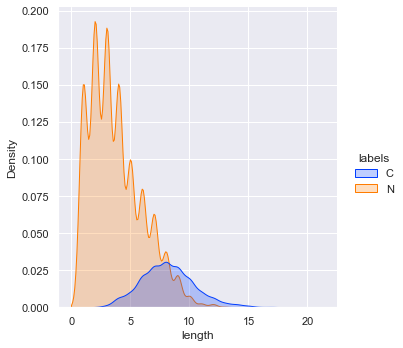

In [22]:
sns.set_palette("bright")
sns.displot(train_data, x="length", hue="labels", kind="kde", fill=True);

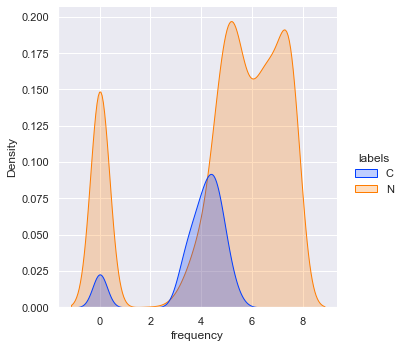

In [23]:
sns.displot(train_data, x="frequency", hue="labels", kind="kde", fill=True);

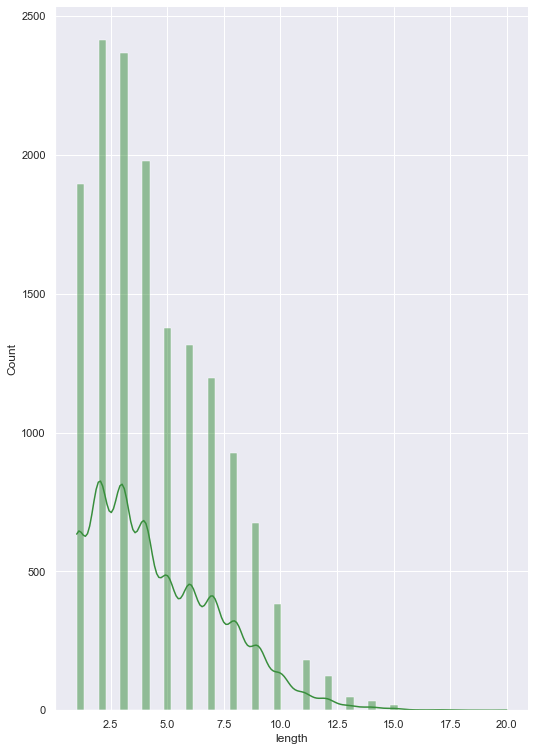

In [32]:
a = sns.displot(train_data, x="length", kde=True, color = "#388E3C");
a.fig.set_figwidth(8.27)
a.fig.set_figheight(11.7)

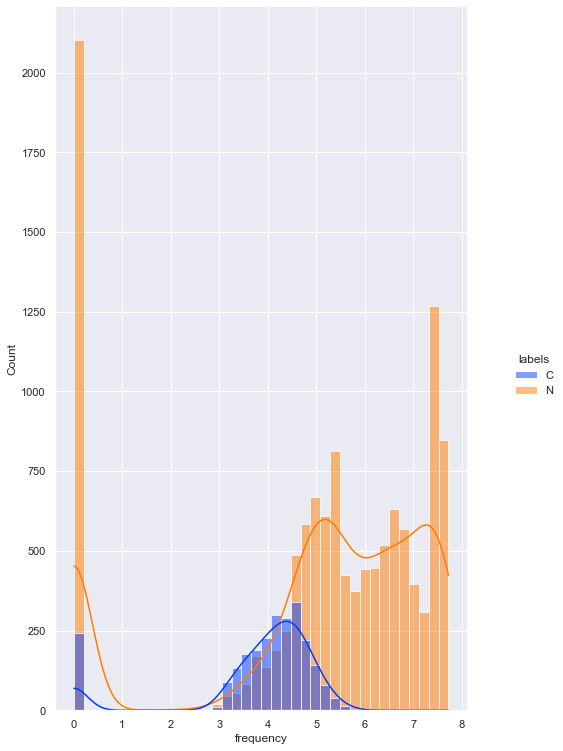

In [25]:
b = sns.displot(train_data, x="frequency",hue="labels",kde=True, color = "#388E3C");
b.fig.set_figwidth(8.27)
b.fig.set_figheight(11.7)

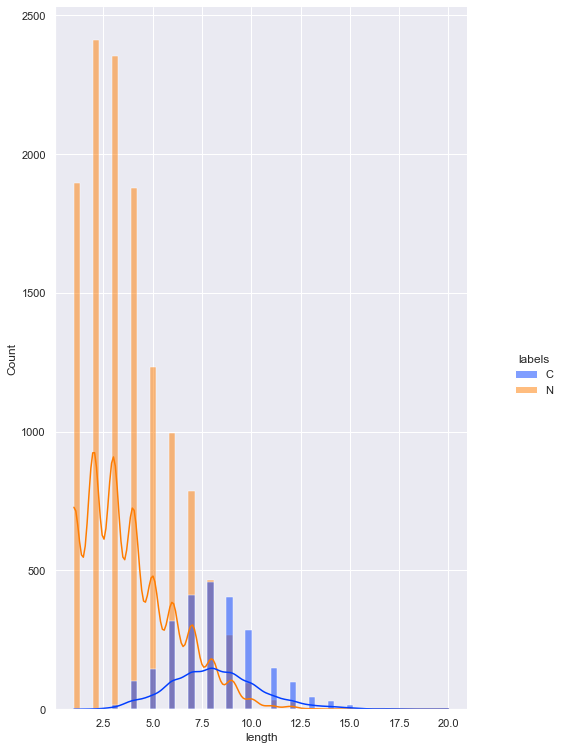

In [26]:
sns.set_palette("bright")
g = sns.displot(train_data, x="length",hue="labels",kde=True, color = "#388E3C");
g.fig.set_figwidth(8.27)
g.fig.set_figheight(11.7)

`Length baseline:` determines the class based on a length threshold 

In [27]:
print(max(train_data["length"]))
print(min(train_data["length"]))

20
1


In [28]:
print(len(train_data["labels"][train_data["labels"] == 'N'][train_data["length"] == 20]))
print(len(train_data["labels"][train_data["labels"] == 'C'][train_data["length"] == 20])) 

# class C is high with max length

0
1
